In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [43]:
tr_df = pd.read_csv('train.csv.gz', index_col='id')

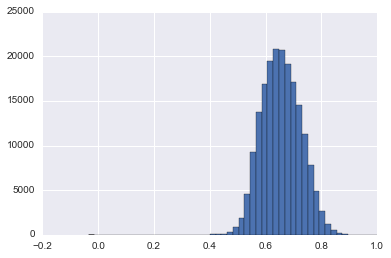

In [5]:
(np.log(tr_df.loss) / np.max(np.log(tr_df.loss))).hist(bins=50)

In [44]:
features = tr_df.drop('loss', axis=1)

In [45]:
tr_cat = tr_df.drop(features.columns[features.columns.str.startswith('cont')], axis=1)

In [46]:
nun = tr_cat.apply(pd.Series.nunique)

In [47]:
tr_sub = tr_df.drop(nun[nun > 10].index, axis=1)

In [48]:
trd = pd.get_dummies(tr_sub, drop_first=True)

In [65]:
cm = trd.corr()

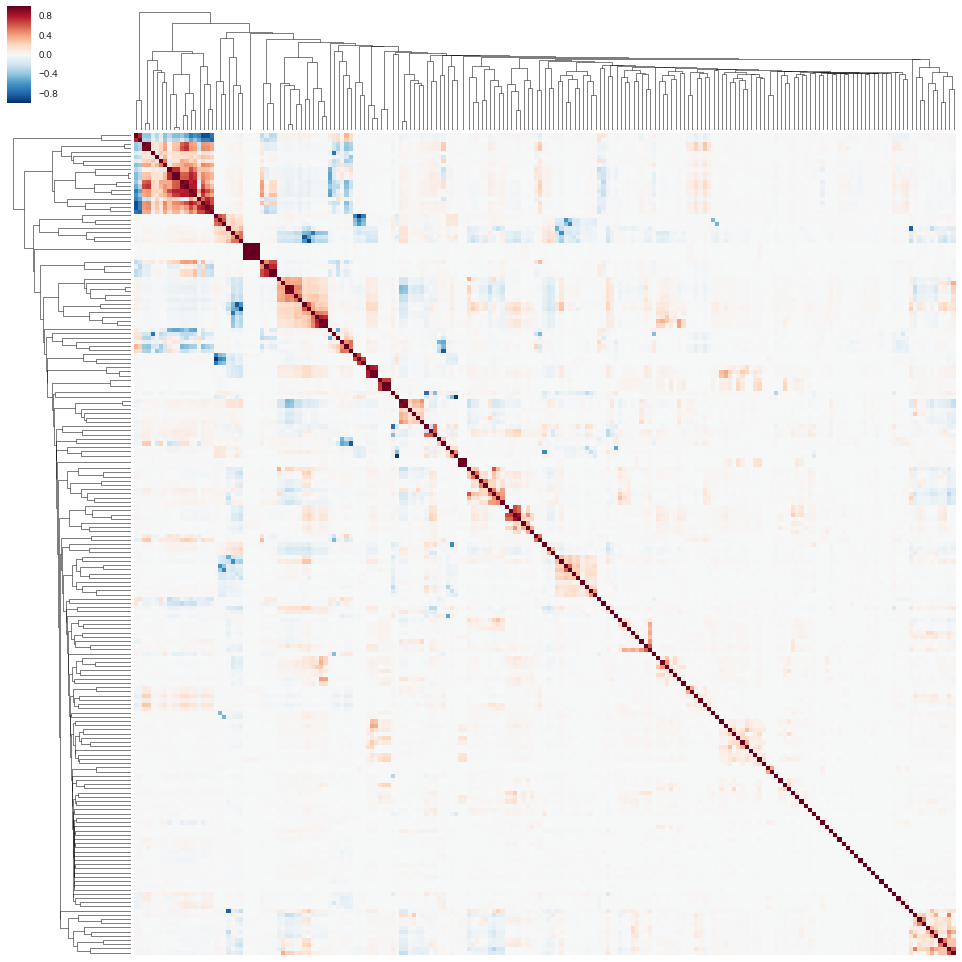

In [68]:
ax = sb.clustermap(cm, figsize=(17, 17))
ax.ax_heatmap.xaxis.set_visible(False)
ax.ax_heatmap.yaxis.set_visible(False)

In [49]:
from sklearn.decomposition import PCA

pca = pd.DataFrame(PCA(2).fit_transform(trd), index=trd.index)

pca['loss'] = np.log(tr_df.loss) / np.max(np.log(tr_df.loss))

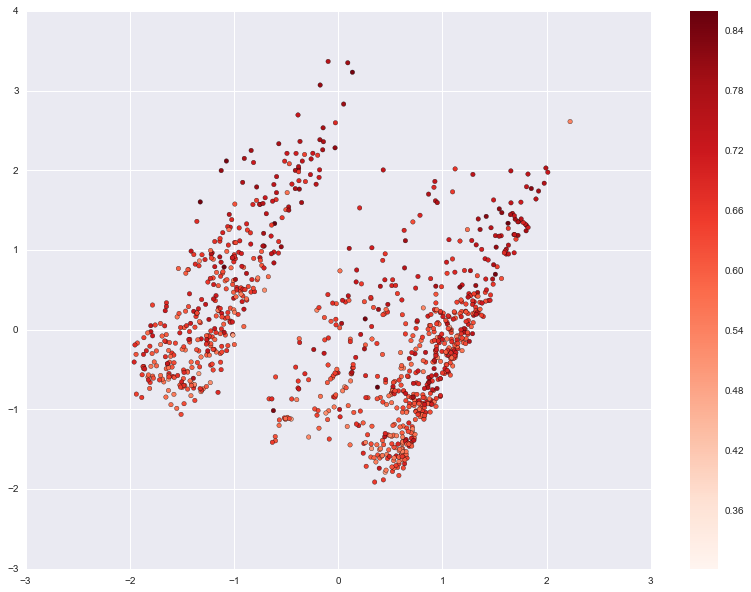

In [24]:
sample = pca.sample(1000)
f = plt.figure(figsize=(14,10))
plt.scatter(sample[0], sample[1], s=20, c=sample.loss, cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

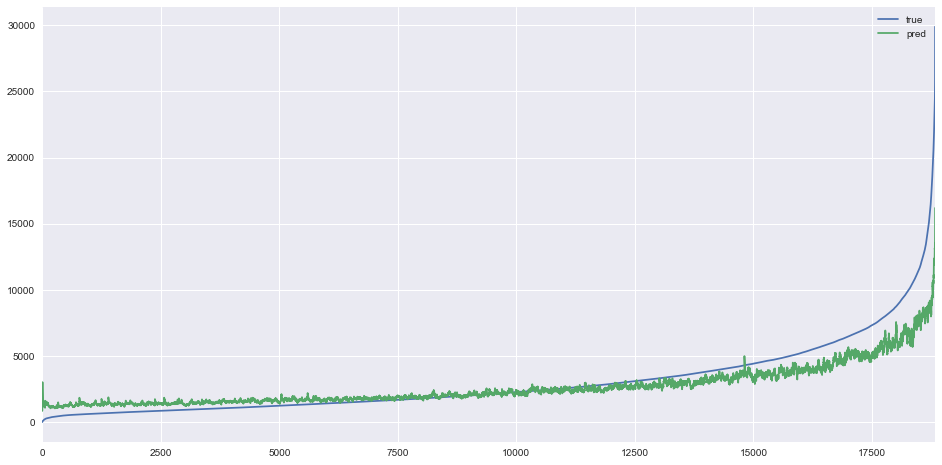

In [5]:
pt = pd.read_csv('est2-results.csv', sep='\t')
pt.sort_values('true').reset_index()[['true', 'pred']].ewm(20).mean().plot(figsize=(16, 8))

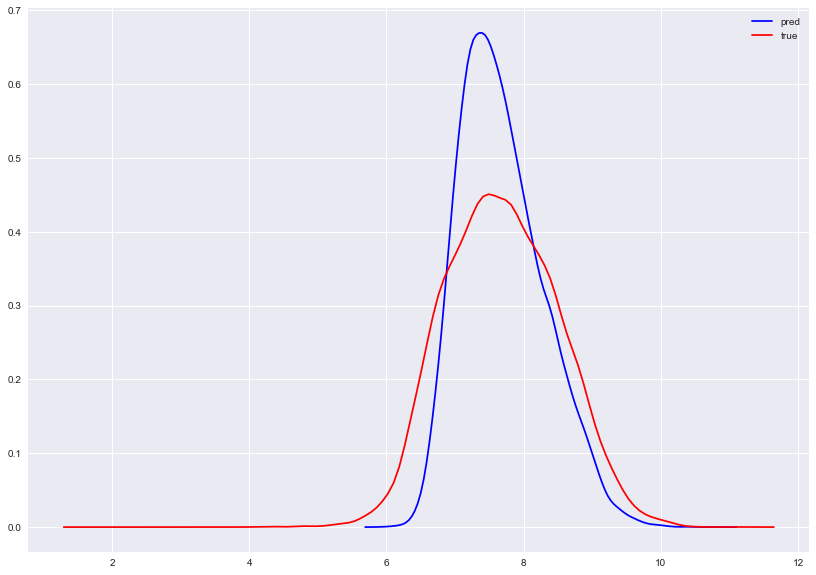

In [3]:
pt = pd.read_csv('est2-results.csv', sep='\t')
plt.figure(figsize=(14, 10))
sb.kdeplot(np.log(pt.pred), color='blue')
sb.kdeplot(np.log(pt.true), color='red')

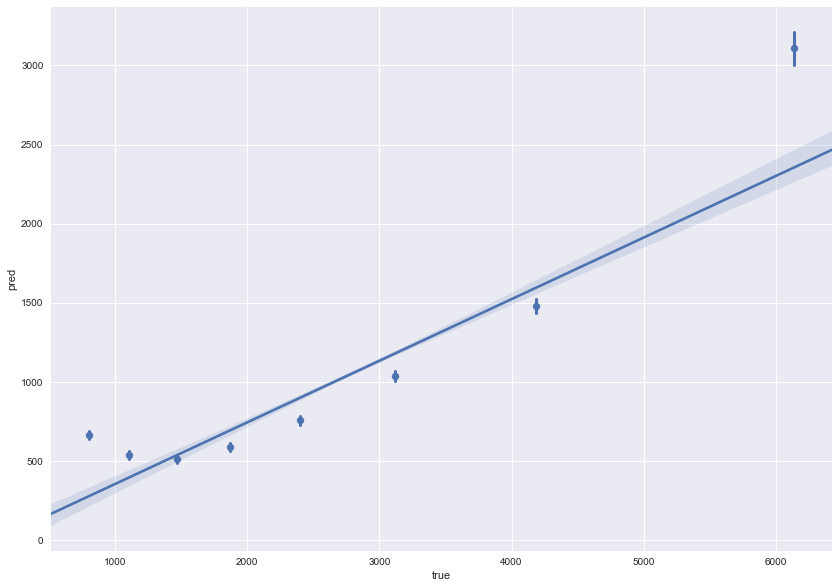

In [6]:
pt = pd.read_csv('est2-results.csv', sep='\t')
plt.figure(figsize=(14, 10))
sb.regplot(pt.true, (pt.pred - pt.true).abs().rename('pred'), x_bins=8)